https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [454]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [455]:
# Tạo một tập dữ liệu ví dụ

data = {'Transaction': [], 'Items': []}

for i in range(10000):
    transaction_name = f'T{i+9}'  # Bắt đầu từ T9, để tránh trùng lặp với T1-T8
    item_count = random.randint(1, 5)  # Số lượng mặt hàng từ 1 đến 5
    items = random.sample(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'K'], item_count)  # Chọn ngẫu nhiên các mặt hàng
    data['Transaction'].append(transaction_name)
    data['Items'].append(items)

df = pd.DataFrame(data)
df

,Transaction,Items
0,T9,"[E, C, H, K, B]"
1,T10,"[G, C, H, D]"
2,T11,[I]
3,T12,[E]
4,T13,"[H, G, I]"
...,...,...
9995,T10004,"[K, D, A]"
9996,T10005,[K]
9997,T10006,"[K, E]"
9998,T10007,[H]


In [456]:
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,B,C,D,E,G,H,I,K
0,False,True,True,False,True,False,True,False,True
1,False,False,True,True,False,True,True,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...
9995,True,False,False,True,False,False,False,False,True
9996,False,False,False,False,False,False,False,False,True
9997,False,False,False,False,True,False,False,False,True
9998,False,False,False,False,False,False,True,False,False


In [457]:
# Sử dụng Apriori để tìm tập mục kết hợp phổ biến
frequent_itemsets = apriori(df, min_support=0.1, max_len = 2, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.3284,(A)
1,0.3287,(B)
2,0.3321,(C)
3,0.3297,(D)
4,0.3326,(E)


In [458]:
rules = association_rules(frequent_itemsets,metric="lift", min_threshold=1.0)
rules = rules.sort_values(by = ['lift','confidence'], ascending = [False,False]).reset_index(drop = True)

In [459]:
rules['combination'] = rules['antecedents'].astype(str) + " > " + rules['consequents'].astype(str)
rules['combination'] = rules['combination'].str.replace('frozenset','',regex = False)\
                                                        .str.replace('(','',regex = False).str.replace(')','',regex = False)\
                                                        .str.replace('{','',regex = False)\
                                                        .str.replace('}','',regex = False)
rules_chart = rules.iloc[::2]
rules_chart.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combination
0,(C),(E),0.3321,0.3326,0.1152,0.346883,1.042945,0.004744,1.021870,0.061651,'C' > 'E'
2,(B),(K),0.3287,0.3392,0.1150,0.349863,1.031436,0.003505,1.016401,0.045401,'B' > 'K'
4,(I),(G),0.3362,0.3375,0.1158,0.344438,1.020557,0.002332,1.010583,0.030344,'I' > 'G'
6,(C),(G),0.3321,0.3375,0.1143,0.344173,1.019773,0.002216,1.010176,0.029031,'C' > 'G'
8,(D),(G),0.3297,0.3375,0.1133,0.343646,1.018210,0.002026,1.009363,0.026680,'D' > 'G'


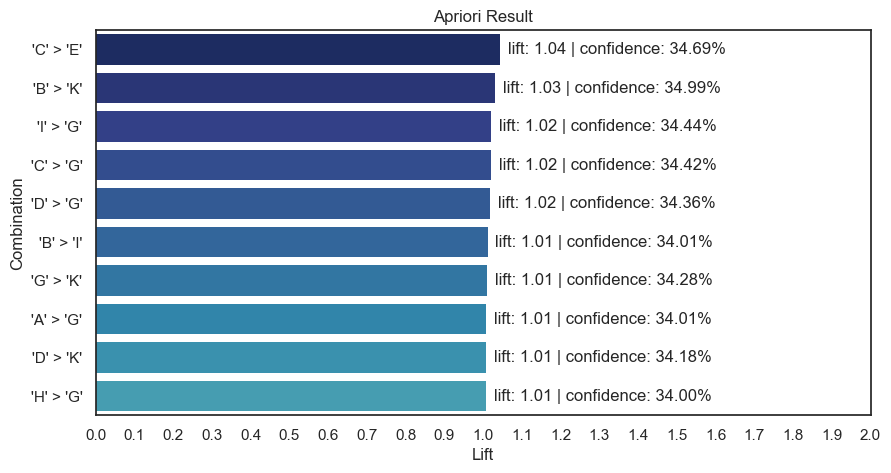

In [460]:
plt.figure(figsize=(10,5))

x_values = [i/10 for i in range (0,21)]
colors = sns.color_palette("YlGnBu_r", len(x_values))

ax = sns.barplot(data = rules_chart.head(10)
                ,x = 'lift'
                ,y = 'combination'
                , linewidth=0
                , palette= colors
                )

for i in range(len(rules_chart.head(10))):
    p = ax.patches[i]                                                           # Lấy patch của chart tại từng bar chart
    lift = p.get_width()                                                        # Lấy giá trị lift
    confidence = rules_chart['confidence'].iloc[i]                              # Lấy giá trị confidence
    label = f'lift: {lift:.2f} | confidence: {confidence*100:.2f}%'             # Lấy giá trị label
    ax.text(x = lift + 0.02                                                     # Lấy x        
            , y= p.get_y() + p.get_height() / 2                                 # Lấy y
            , s = label                                                         # Lấy label                
            , ha='left'                                                         # Căn chỉnh dọc (vertical alignment)
            , va='center'                                                       # Căn chỉnh dọc (vertical alignment)
            )


plt.xticks(x_values)

plt.grid(False)

plt.xlabel('Lift')
plt.ylabel('Combination')
plt.title('Apriori Result')

plt.show()